# Coursera Capstone Project Code

## An Exploration of Food Desserts and its Implications in Milwaukee

### Imports

In [1]:
!pip install descartes
import pandas as pd
import matplotlib.pyplot as plt
!pip install geopandas
import geopandas as gdp
from shapely.geometry import Point, Polygon
%matplotlib inline
import descartes
import pickle
import numpy as np 

### accesing neighborhood data for Milwaukee

In [2]:
from arcgis.gis import GIS

# Python Standard Library Modules
from pathlib import Path
public_data_item_id = '12f8aa130d734d4aa83b6147bea8322c'
anon_gis = GIS()
data_item = anon_gis.content.get(public_data_item_id)
# `ContentManager.get` will return `None` if there is no Item with ID `a04933c045714492bda6886f355416f2`
data_item

<Item title:"Enriched_neighborhood_2" type:Feature Layer Collection owner:mkluge12>

In [3]:
flayer = data_item.layers[0]
sdf = pd.DataFrame.spatial.from_layer(flayer)
sdf.head()

,ACSHHBPOV,BACHDEG_CY,ENRICH_FID,HSGRAD_CY,HasData,ID,Lattitude,Neighbor_1,Neighborho,OBJECTID,OBJECTID_1,SHAPE,SHAPE_STAr,SHAPE_STLe,SYMBOL,aggregationMethod,apportionmentConfidence,longitude,populationToPolygonSizeRating,sourceCountry
0,89,78,1,192,1,0,None,New Coeln,NEW COELN,3,1,"{""rings"": [[[-9787134.2, 5301349.8], [-9787185...",5.723546e+06,9615.009330,1,BlockApportionment:US.BlockGroups,2.576,None,2.191,US
1,287,291,2,613,1,1,None,Southpoint,SOUTHPOINT,4,2,"{""rings"": [[[-9789296.2, 5309102.2], [-9789298...",1.073536e+07,14415.135317,4,BlockApportionment:US.BlockGroups,2.576,None,2.191,US
2,297,808,3,1009,1,2,None,Town Of Lake,TOWN OF LAKE,5,3,"{""rings"": [[[-9785272.1, 5307420.5], [-9785150...",2.737191e+07,25967.630731,2,BlockApportionment:US.BlockGroups,2.576,None,2.191,US
3,277,1023,4,1155,1,3,None,Tippecanoe,TIPPECANOE,6,4,"{""rings"": [[[-9783504.9, 5309015.4], [-9783504...",2.645802e+07,33503.757162,4,BlockApportionment:US.BlockGroups,2.576,None,2.191,US
4,434,722,5,1931,1,4,None,Morgandale,MORGANDALE,7,5,"{""rings"": [[[-9786640.8, 5309838.8], [-9786649...",2.952580e+07,22330.698849,2,BlockApportionment:US.BlockGroups,2.576,None,2.191,US


### retrieving CSV I made containing geospatial data on Milwaukee neighborhoods

In [4]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_18530f056f7b48cb99c36c630c43e2b6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='GleIsPwn-q1FkSxi-9OC7h93alFa8s4A-B-oVBc_9TM2',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_18530f056f7b48cb99c36c630c43e2b6.get_object(Bucket='couseracapstone-donotdelete-pr-tiizmqymjcic4p',Key='neighborhood.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
geo = df_data_0
del geo ['Unnamed: 3']
del geo ['Unnamed: 4']
del geo ['Unnamed: 5']
geo.head()

,Neighbor_1,Lat,Long
0,New Coeln,42.933868,-87.915041
1,Southpoint,42.977249,-87.946328
2,Town Of Lake,42.965217,-87.905328
3,Tippecanoe,42.975360,-87.899835
4,Morgandale,42.981388,-87.928417


### mergeing and formatting table

In [5]:
geo.columns = ['Neighbor_1','Lat','Long']
new = pd.merge(sdf,geo[['Neighbor_1','Lat', 'Long']],on='Neighbor_1')
del new ['ACSHHBPOV']
del new ['BACHDEG_CY']
del new ['ENRICH_FID']
del new ['HSGRAD_CY']
del new ['HasData']
del new ['ID']
del new ['Lattitude']
del new ['SHAPE_STAr']
del new ['SHAPE_STLe']
del new ['SYMBOL']
del new ['aggregationMethod']
del new ['apportionmentConfidence']
del new ['longitude']
del new ['populationToPolygonSizeRating']
del new ['sourceCountry']
del new ['SHAPE']
del new ['OBJECTID_1']
del new ['Neighborho']
new = pd.merge(new,sdf[['Neighbor_1','ACSHHBPOV', 'HSGRAD_CY']],on='Neighbor_1')
new.head()

,Neighbor_1,OBJECTID,Lat,Long,ACSHHBPOV,HSGRAD_CY
0,New Coeln,3,42.933868,-87.915041,89,192
1,Southpoint,4,42.977249,-87.946328,287,613
2,Town Of Lake,5,42.965217,-87.905328,297,1009
3,Tippecanoe,6,42.975360,-87.899835,277,1155
4,Morgandale,7,42.981388,-87.928417,434,1931


### Mapping imports

In [6]:
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
#import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be 

In [7]:
address = 'Milwaukee, WI'

geolocator = Nominatim(user_agent="Milwaukee")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [8]:
map_mke = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, pov, neighborhood in zip(new['Lat'], new['Long'], new['ACSHHBPOV'], new['Neighbor_1']):
    label = '{}, {}'.format(neighborhood, pov)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mke)  
    
map_mke

Poverty index Higher = more poverty Lower = lower poverity

### entering my foursquare credintials

In [9]:
# @hidden_cell
CLIENT_ID = '5LA3VOGKTUBSXNLXVJAOHTN4P1HPSBYEOOE1BTKR2S0I5HYW'
CLIENT_SECRET = 'HG2XKLORTACRD3CQ01ND5JUSNJGPBE25QJCO3SM2CH0IINLJ'

### Foursquare request

In [12]:
import requests
VERSION = '20180605' # Foursquare API version
LIMIT = 100
radius = 500
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
#use the function to return nearby venues
mke_venues = getNearbyVenues(names=new['Neighbor_1'],
                                   latitudes=new['Lat'],
                                   longitudes=new['Long']
                                  )

New Coeln
Southpoint
Town Of Lake
Tippecanoe
Morgandale
Southgate
Bay View
Wedgewood
Fairview
Menomonee River Valley
Marquette
Martin Drive
Fair Park
Zoo
Midtown
Triangle
Hillside
Uptown
Havenwoods
Mc Govern Park
Hampton Heights
Northpoint
Riverwest
Harambee
Williamsburg
Valhalla
Land Bank
Brynwood
North Granville
Northridge
Ridgeview
Graceland
Fairfield
Polonia
Fernwood
Concordia
Gra-ram
Lyons Park
Veterans Affairs
Alverno
Silver Spring
Silver Swan
Wahl Park
Grantosa
Lincoln Creek
St. Amelian's
Old North Milwaukee
Lincoln Park
Estabrook Park
Rufus King
Garden Homes
Arlington Heights
Borchert Field
Franklin Heights
Roosevelt Grove
Grasslyn Manor
Dineen Park
Sunset Heights
Enderis Park
Saint Joseph
Sherman Park
Park West
North Division
Metcalfe Park
Downer Woods
Upper East Side
Murray Hill
Nash Park
Kops Park
Mount Mary
Cooper Park
Washington Heights
Washington Park
Hilltop Parish
Woodlands
Northridge Lakes
Freedom Village
Servite Woods
Granville Station
Whispering Hills
Granville Woods

In [13]:
# one hot encoding
mke_onehot = pd.get_dummies(mke_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mke_onehot['Neighborhood'] = mke_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mke_onehot.columns[-1]] + list(mke_onehot.columns[:-1])
mke_onehot = mke_onehot[fixed_columns]

mke_onehot.head()

,Zoo Exhibit,ATM,Accessories Store,African Restaurant,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,...,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Weight Loss Center,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
mke_grouped = mke_onehot.groupby('Neighborhood').mean().reset_index()
mke_grouped

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,African Restaurant,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Weight Loss Center,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Alcott Park,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000,0.0,0.0,0.000000
1,Alverno,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000,0.0,0.0,0.000000
2,Arlington Gardens,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000,0.0,0.0,0.000000
3,Arlington Heights,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.25,0.000,0.0,0.0,0.000000
4,Avenues West,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.130435,...,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000,0.0,0.0,0.000000
5,Baran Park,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000,0.0,0.0,0.000000
6,Bay View,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,...,0.000000,0.000000,0.041667,0.0,0.0,0.00,0.000,0.0,0.0,0.000000
7,Bluemound Heights,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000,0.0,0.0,0.000000
8,Borchert Field,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000,0.0,0.0,0.000000
9,Bradley Estates,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000,0.0,0.0,0.000000


### doing week 3 technique to get an exploration of the data

In [15]:
num_top_venues = 5

for hood in mke_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mke_grouped[mke_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alcott Park----
                     venue  freq
0                     Park  0.33
1               Playground  0.33
2            Historic Site  0.33
3                 Mountain  0.00
4  New American Restaurant  0.00


----Alverno----
                      venue  freq
0               Coffee Shop  0.25
1              Concert Hall  0.25
2                Playground  0.25
3  College Baseball Diamond  0.25
4               Music Store  0.00


----Arlington Gardens----
                venue  freq
0      Cosmetics Shop   0.4
1   Convenience Store   0.2
2      Rental Service   0.2
3  Chinese Restaurant   0.2
4         Zoo Exhibit   0.0


----Arlington Heights----
               venue  freq
0  Fish & Chips Shop  0.25
1   Greek Restaurant  0.25
2           Wine Bar  0.25
3                Bar  0.25
4        Zoo Exhibit  0.00


----Avenues West----
                 venue  freq
0  American Restaurant  0.13
1       Cosmetics Shop  0.09
2          Pizza Place  0.09
3            BBQ Joint  0.04
4     

In [17]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [19]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mke_grouped['Neighborhood']

for ind in np.arange(mke_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mke_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alcott Park,Playground,Park,Historic Site,Comfort Food Restaurant,Discount Store,Fabric Shop,Exhibit,Event Space,Ethiopian Restaurant,Empanada Restaurant
1,Alverno,Playground,Concert Hall,College Baseball Diamond,Coffee Shop,Zoo,Electronics Store,Dive Bar,Dive Shop,Dog Run,Donut Shop
2,Arlington Gardens,Cosmetics Shop,Rental Service,Chinese Restaurant,Convenience Store,Dive Bar,Dive Shop,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store
3,Arlington Heights,Fish & Chips Shop,Wine Bar,Greek Restaurant,Bar,Zoo,Electronics Store,Dive Bar,Dive Shop,Dog Run,Donut Shop
4,Avenues West,American Restaurant,Pizza Place,Cosmetics Shop,Diner,Asian Restaurant,Steakhouse,Dive Bar,Café,Bar,Music Venue
5,Baran Park,Mexican Restaurant,Eastern European Restaurant,Locksmith,Latin American Restaurant,Pizza Place,Park,Plaza,Tennis Court,Skate Park,Baseball Field
6,Bay View,Thrift / Vintage Store,New American Restaurant,Bar,Pizza Place,Gift Shop,Fried Chicken Joint,Chinese Restaurant,Record Shop,Fast Food Restaurant,Art Gallery
7,Bluemound Heights,Baseball Field,Southern / Soul Food Restaurant,Dive Bar,Home Service,Italian Restaurant,Sports Bar,Electronics Store,Dive Shop,Dog Run,Donut Shop
8,Borchert Field,Candy Store,Arts & Crafts Store,Lounge,Flower Shop,Food & Drink Shop,Bar,Zoo,Electronics Store,Dog Run,Donut Shop
9,Bradley Estates,Spa,Convenience Store,Golf Course,Zoo,Electronics Store,Dive Bar,Dive Shop,Dog Run,Donut Shop,Eastern European Restaurant


In [20]:
# set number of clusters
kclusters = 5

mke_grouped_clustering = mke_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mke_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 0, 1, 3, 1, 1, 1, 1, 3, 1], dtype=int32)

In [29]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

mke_merged = new
mke_merged.rename(columns={'Neighbor_1': 'Neighborhood'}, inplace=True)
mke_merged = mke_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

mke_merged.head() # check the last columns!

,Neighborhood,OBJECTID,Lat,Long,ACSHHBPOV,HSGRAD_CY,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New Coeln,3,42.933868,-87.915041,89,192,1.0,Diner,Construction & Landscaping,Park,Sports Bar,Bakery,Cosmetics Shop,Rental Car Location,Flower Shop,Zoo,Electronics Store
1,Southpoint,4,42.977249,-87.946328,287,613,1.0,Pizza Place,Chinese Restaurant,Asian Restaurant,Pharmacy,Department Store,Discount Store,Salon / Barbershop,Sandwich Place,Mobile Phone Shop,Mattress Store
2,Town Of Lake,5,42.965217,-87.905328,297,1009,1.0,Massage Studio,Thrift / Vintage Store,Dive Bar,American Restaurant,Exhibit,Event Space,Ethiopian Restaurant,Empanada Restaurant,Elementary School,Fabric Shop
3,Tippecanoe,6,42.975360,-87.899835,277,1155,1.0,Liquor Store,Brewery,Zoo,Elementary School,Dive Shop,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant
4,Morgandale,7,42.981388,-87.928417,434,1931,1.0,Food Truck,Cosmetics Shop,Dive Bar,Mexican Restaurant,Playground,Cocktail Bar,Music Store,Flower Shop,Food & Drink Shop,Bar


In [44]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,i in zip(mke_merged['Lat'], mke_merged['Long'], mke_merged['Neighborhood'], mke_merged['Cluster Labels'], mke_merged['OBJECTID']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color= rainbow[1],
        fill=True,
        fill_color=rainbow[1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [46]:
mke_merged.loc[mke_merged['Cluster Labels'] == 0, mke_merged.columns[[1] + list(range(5, mke_merged.shape[1]))]]

,OBJECTID,HSGRAD_CY,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,43,144,0.0,Playground,Concert Hall,College Baseball Diamond,Coffee Shop,Zoo,Electronics Store,Dive Bar,Dive Shop,Dog Run,Donut Shop
55,59,760,0.0,Coffee Shop,Zoo,Electronics Store,Distillery,Dive Bar,Dive Shop,Dog Run,Donut Shop,Eastern European Restaurant,Elementary School
177,182,30,0.0,Concert Hall,Coffee Shop,Zoo,Electronics Store,Dive Bar,Dive Shop,Dog Run,Donut Shop,Eastern European Restaurant,Empanada Restaurant
178,183,49,0.0,Concert Hall,Zoo,Elementary School,Dive Bar,Dive Shop,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant


In [47]:
mke_merged.loc[mke_merged['Cluster Labels'] == 1, mke_merged.columns[[1] + list(range(5, mke_merged.shape[1]))]]

,OBJECTID,HSGRAD_CY,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,192,1.0,Diner,Construction & Landscaping,Park,Sports Bar,Bakery,Cosmetics Shop,Rental Car Location,Flower Shop,Zoo,Electronics Store
1,4,613,1.0,Pizza Place,Chinese Restaurant,Asian Restaurant,Pharmacy,Department Store,Discount Store,Salon / Barbershop,Sandwich Place,Mobile Phone Shop,Mattress Store
2,5,1009,1.0,Massage Studio,Thrift / Vintage Store,Dive Bar,American Restaurant,Exhibit,Event Space,Ethiopian Restaurant,Empanada Restaurant,Elementary School,Fabric Shop
3,6,1155,1.0,Liquor Store,Brewery,Zoo,Elementary School,Dive Shop,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant
4,7,1931,1.0,Food Truck,Cosmetics Shop,Dive Bar,Mexican Restaurant,Playground,Cocktail Bar,Music Store,Flower Shop,Food & Drink Shop,Bar
5,8,460,1.0,Sandwich Place,Pizza Place,Bagel Shop,Fast Food Restaurant,Movie Theater,Chinese Restaurant,Noodle House,Indian Restaurant,Ice Cream Shop,Coffee Shop
6,9,2601,1.0,Thrift / Vintage Store,New American Restaurant,Bar,Pizza Place,Gift Shop,Fried Chicken Joint,Chinese Restaurant,Record Shop,Fast Food Restaurant,Art Gallery
9,12,18,1.0,Brewery,Food Court,Casino,Italian Restaurant,Steakhouse,Furniture / Home Store,Bar,Diner,Asian Restaurant,Restaurant
10,13,19,1.0,Sandwich Place,Coffee Shop,American Restaurant,Theater,College Rec Center,Pub,Bowling Alley,Burger Joint,Burrito Place,Convenience Store
11,14,280,1.0,Dessert Shop,Mexican Restaurant,Snack Place,Park,Gym / Fitness Center,Bowling Alley,Empanada Restaurant,Food Court,Food,Bar


In [49]:
mke_merged.loc[mke_merged['Cluster Labels'] == 2, mke_merged.columns[[1] + list(range(5, mke_merged.shape[1]))]]

,OBJECTID,HSGRAD_CY,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,18,1102,2.0,Salon / Barbershop,Park,Liquor Store,Art Gallery,Zoo,Eastern European Restaurant,Dive Bar,Dive Shop,Dog Run,Donut Shop
15,19,64,2.0,Southern / Soul Food Restaurant,Convenience Store,Park,Bus Station,Deli / Bodega,Zoo,Eastern European Restaurant,Dive Bar,Dive Shop,Dog Run
18,22,89,2.0,Hobby Shop,Discount Store,Factory,Fabric Shop,Exhibit,Event Space,Ethiopian Restaurant,Empanada Restaurant,Elementary School,Electronics Store
19,23,447,2.0,Garden,Convenience Store,Park,Electronics Store,Distillery,Dive Bar,Dive Shop,Dog Run,Donut Shop,Eastern European Restaurant
20,24,1221,2.0,Food,Wings Joint,Park,Steakhouse,Electronics Store,Dive Bar,Dive Shop,Dog Run,Donut Shop,Eastern European Restaurant
36,40,373,2.0,Park,Beer Garden,Cosmetics Shop,Dive Bar,Exhibit,Event Space,Fabric Shop,Factory,Distillery,Empanada Restaurant
47,51,1059,2.0,Pool,Park,Basketball Court,Zoo,Eastern European Restaurant,Distillery,Dive Bar,Dive Shop,Dog Run,Donut Shop
56,60,768,2.0,Pool,Park,Tennis Court,Disc Golf,Zoo,Donut Shop,Distillery,Dive Bar,Dive Shop,Dog Run
58,62,447,2.0,Park,Playground,Sports Bar,Farmers Market,Video Store,Grocery Store,Salon / Barbershop,Sporting Goods Shop,Elementary School,Empanada Restaurant
72,77,652,2.0,Park,Bar,Convenience Store,Other Great Outdoors,Zoo,Dive Shop,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store


In [50]:
mke_merged.loc[mke_merged['Cluster Labels'] == 3, mke_merged.columns[[1] + list(range(5, mke_merged.shape[1]))]]

,OBJECTID,HSGRAD_CY,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,20,343,3.0,Brewery,Bar,Flower Shop,BBQ Joint,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Elementary School,Zoo
22,26,1047,3.0,Bar,Playground,Art Gallery,Coffee Shop,Deli / Bodega,Diner,Discount Store,Rock Club,Brewery,Mexican Restaurant
23,27,2043,3.0,Bar,Lounge,Video Store,Café,Bank,Baseball Field,Fried Chicken Joint,Grocery Store,Pharmacy,Elementary School
25,29,730,3.0,Gift Shop,Zoo,Eastern European Restaurant,Distillery,Dive Bar,Dive Shop,Dog Run,Donut Shop,Electronics Store,Disc Golf
27,31,1,3.0,Golf Course,Zoo,Eastern European Restaurant,Distillery,Dive Bar,Dive Shop,Dog Run,Donut Shop,Electronics Store,Disc Golf
31,35,408,3.0,Bar,Café,Soccer Field,Bowling Alley,Elementary School,Dive Shop,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store
40,44,2092,3.0,Music Venue,BBQ Joint,Lingerie Store,Zoo,Electronics Store,Dive Shop,Dog Run,Donut Shop,Eastern European Restaurant,Elementary School
44,48,1146,3.0,Bar,Mobile Phone Shop,Department Store,Gym,Elementary School,Dive Shop,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store
46,50,2319,3.0,Pharmacy,Video Store,Liquor Store,Food,Bar,BBQ Joint,Fried Chicken Joint,Grocery Store,Factory,Pet Store
49,53,707,3.0,Bar,Elementary School,Dive Bar,Dive Shop,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Zoo,Farmers Market


In [51]:
mke_merged.loc[mke_merged['Cluster Labels'] == 4, mke_merged.columns[[1] + list(range(5, mke_merged.shape[1]))]]

,OBJECTID,HSGRAD_CY,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,10,314,4.0,Playground,Pizza Place,Eastern European Restaurant,Discount Store,Distillery,Dive Bar,Dive Shop,Dog Run,Donut Shop,Electronics Store
8,11,840,4.0,Pizza Place,Bar,Playground,Food Truck,Dive Bar,Dive Shop,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store
78,83,117,4.0,Playground,Food Truck,Rental Service,Event Space,Ethiopian Restaurant,Empanada Restaurant,Elementary School,Electronics Store,Disc Golf,Eastern European Restaurant
88,93,77,4.0,Playground,Park,Golf Course,Disc Golf,Ethiopian Restaurant,Empanada Restaurant,Elementary School,Event Space,Electronics Store,Diner
97,102,90,4.0,Playground,Disc Golf,Fabric Shop,Exhibit,Event Space,Ethiopian Restaurant,Empanada Restaurant,Elementary School,Electronics Store,Eastern European Restaurant
114,119,106,4.0,Playground,Music Venue,Trail,Disc Golf,Distillery,Dive Bar,Dive Shop,Dog Run,Donut Shop,Eastern European Restaurant
170,175,300,4.0,Playground,Park,Historic Site,Comfort Food Restaurant,Discount Store,Fabric Shop,Exhibit,Event Space,Ethiopian Restaurant,Empanada Restaurant


In [60]:
grocery_stores = mke_grouped[['Grocery Store', 'Neighborhood']]
grocery_stores = pd.merge(grocery_stores,new[['Neighborhood','ACSHHBPOV']],on='Neighborhood')

### Dropping 0 values

it is likely some of the neighborhoods dont actually have grocery stores but there is way too many listed as having none so i made the decesion to only test on ones with grocery stores.

In [65]:

indexNames = grocery_stores[ grocery_stores['Grocery Store'] == 0.000000 ].index
grocery_stores.drop(indexNames , inplace=True)


,Grocery Store,Neighborhood,ACSHHBPOV
4,0.043478,Avenues West,2054
14,0.071429,Burnham Park,531
22,0.250000,Cold Spring Park,484
31,0.111111,Enderis Park,243
35,0.083333,Fairfield,213
40,0.200000,Franklin Heights,925
42,0.250000,Garden Homes,462
56,0.090909,Harambee,1757
57,0.027778,Harbor View,35
60,0.250000,Hawley Farms,87


### Normalizing data

In [101]:
Pov = grocery_stores[['ACSHHBPOV']]
normalized_df=(Pov-Pov.min())/(Pov.max()-Pov.min())
grocery_stores[['ACSHHBPOV']] = normalized_df
grocery_stores.plot()

KeyError: "None of [Index(['ACSHHBPOV'], dtype='object')] are in the [columns]"

In [79]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
X = pd.DataFrame(grocery_stores['ACSHHBPOV'])
y = pd.DataFrame(grocery_stores['Grocery Store'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

[-0.06572541373902241, -0.25104290658195527, 0.04004430511345258]


### trying with HS degrees

In [85]:
grocery_stores = pd.merge(grocery_stores,new[['Neighborhood','HSGRAD_CY']],on='Neighborhood')
grocery_stores

,Grocery Store,Neighborhood,ACSHHBPOV,HSGRAD_CY_x,HSGRAD_CY_y,HSGRAD_CY_x,HSGRAD_CY_y,HSGRAD_CY
0,0.043478,Avenues West,1.000000,579,579,579,579,579
1,0.071429,Burnham Park,0.258520,1122,1122,1122,1122,1122
2,0.250000,Cold Spring Park,0.235638,474,474,474,474,474
3,0.111111,Enderis Park,0.118306,447,447,447,447,447
4,0.083333,Fairfield,0.103700,438,438,438,438,438
5,0.200000,Franklin Heights,0.450341,1680,1680,1680,1680,1680
6,0.250000,Garden Homes,0.224927,475,475,475,475,475
7,0.090909,Harambee,0.855404,2043,2043,2043,2043,2043
8,0.027778,Harbor View,0.017040,46,46,46,46,46
9,0.250000,Hawley Farms,0.042356,354,354,354,354,354


In [90]:
del grocery_stores['HSGRAD_CY_y']
grocery_stores

,Grocery Store,Neighborhood,HSGRAD_CY
0,0.043478,Avenues West,579
1,0.071429,Burnham Park,1122
2,0.250000,Cold Spring Park,474
3,0.111111,Enderis Park,447
4,0.083333,Fairfield,438
5,0.200000,Franklin Heights,1680
6,0.250000,Garden Homes,475
7,0.090909,Harambee,2043
8,0.027778,Harbor View,46
9,0.250000,Hawley Farms,354


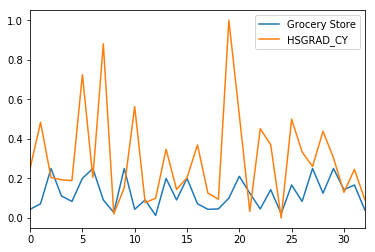

In [99]:
grad = grocery_stores[['HSGRAD_CY']]
normalized_df=(grad-grad.min())/(grad.max()-grad.min())
grocery_stores[['HSGRAD_CY']] = normalized_df
grocery_stores.plot()

In [97]:
X = pd.DataFrame(grocery_stores['HSGRAD_CY'])
y = pd.DataFrame(grocery_stores['Grocery Store'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

[-0.12778523442855816, -0.26521306121069865, -0.11520186421134104]
